# Data preparation

In [ ]:
import numpy as np
import pandas as pd
import cv2
import Finger_functions as f #we import our previously defined functions
import matplotlib.pyplot as plt

In [2]:
fingerprint_df = f.create_fingerprint_dataframe()

In [3]:
fingerprint_df

,file_path,modification,gender,hand,finger,method
0,./SOCOFing/Real/1__M_Right_middle_finger.BMP,real,Male,Right,middle,None
1,./SOCOFing/Real/1__M_Right_thumb_finger.BMP,real,Male,Right,thumb,None
2,./SOCOFing/Real/1__M_Right_ring_finger.BMP,real,Male,Right,ring,None
3,./SOCOFing/Real/1__M_Left_little_finger.BMP,real,Male,Left,little,None
4,./SOCOFing/Real/1__M_Left_index_finger.BMP,real,Male,Left,index,None
...,...,...,...,...,...,...
55265,./SOCOFing/Altered/Altered-Hard/600__M_Left_in...,hard,Male,Left,index,Obl
55266,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,hard,Male,Right,thumb,Zcut
55267,./SOCOFing/Altered/Altered-Hard/600__M_Right_m...,hard,Male,Right,middle,CR
55268,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,hard,Male,Right,thumb,Obl


In [4]:
rows, columns = fingerprint_df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")


The DataFrame has 55270 rows and 6 columns.


In [5]:
import os

paths = [f.path_real, f.path_altered_easily, f.path_altered_medium, f.path_altered_hard]

total_files = 0
for path in paths:
    num_files = len(os.listdir(path))
    total_files += num_files
    print(f"Number of files in {path}: {num_files}")

print(f"Total number of files: {total_files}")


Number of files in ./SOCOFing/Real/: 6000
Number of files in ./SOCOFing/Altered/Altered-Easy/: 17931
Number of files in ./SOCOFing/Altered/Altered-Medium/: 17067
Number of files in ./SOCOFing/Altered/Altered-Hard/: 14272
Total number of files: 55270


So it really does have 55270 rows, so all of our data is loaded

In [6]:
fingerprint_df['modification'] = fingerprint_df['modification'].map({'real': 0,'easily': 1, 'medium': 2 ,'hard': 3})
fingerprint_df['gender'] = fingerprint_df['gender'].map({'Male': 0, 'Female': 1})
fingerprint_df['hand'] = fingerprint_df['hand'].map({'Right': 0, 'Left': 1})
fingerprint_df['finger'] = fingerprint_df['finger'].map({'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3,'little': 4})
fingerprint_df['method'] = fingerprint_df['method'].map({None: 0, 'CR': 1, 'Obl': 2, 'Zcut': 3}) 

In [7]:
fingerprint_df

,file_path,modification,gender,hand,finger,method
0,./SOCOFing/Real/1__M_Right_middle_finger.BMP,0,0,0,2,0
1,./SOCOFing/Real/1__M_Right_thumb_finger.BMP,0,0,0,0,0
2,./SOCOFing/Real/1__M_Right_ring_finger.BMP,0,0,0,3,0
3,./SOCOFing/Real/1__M_Left_little_finger.BMP,0,0,1,4,0
4,./SOCOFing/Real/1__M_Left_index_finger.BMP,0,0,1,1,0
...,...,...,...,...,...,...
55265,./SOCOFing/Altered/Altered-Hard/600__M_Left_in...,3,0,1,1,2
55266,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,3,0,0,0,3
55267,./SOCOFing/Altered/Altered-Hard/600__M_Right_m...,3,0,0,2,1
55268,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,3,0,0,0,2


In [8]:
fingerprint_df['image_data'] = fingerprint_df['file_path'].apply(f.load_image)

In [9]:
fingerprint_df

,file_path,modification,gender,hand,finger,method,image_data
0,./SOCOFing/Real/1__M_Right_middle_finger.BMP,0,0,0,2,0,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
1,./SOCOFing/Real/1__M_Right_thumb_finger.BMP,0,0,0,0,0,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
2,./SOCOFing/Real/1__M_Right_ring_finger.BMP,0,0,0,3,0,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
3,./SOCOFing/Real/1__M_Left_little_finger.BMP,0,0,1,4,0,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
4,./SOCOFing/Real/1__M_Left_index_finger.BMP,0,0,1,1,0,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
...,...,...,...,...,...,...,...
55265,./SOCOFing/Altered/Altered-Hard/600__M_Left_in...,3,0,1,1,2,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
55266,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,3,0,0,0,3,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
55267,./SOCOFing/Altered/Altered-Hard/600__M_Right_m...,3,0,0,2,1,"[[0.6274509803921569, 0.6274509803921569, 0.62..."
55268,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,3,0,0,0,2,"[[0.6274509803921569, 0.6274509803921569, 0.62..."


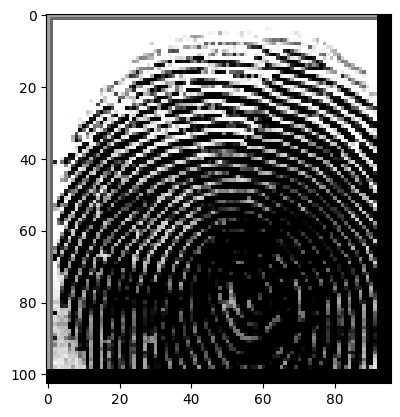

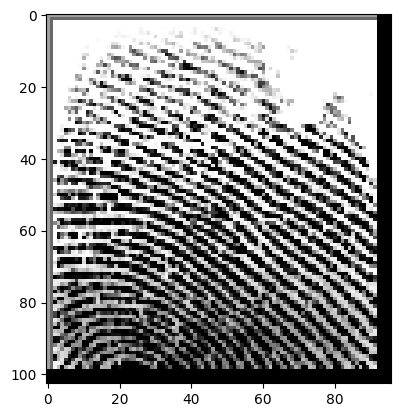

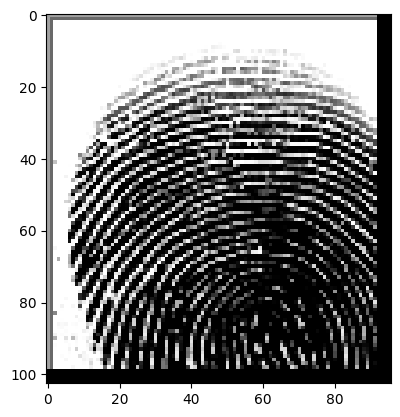

In [10]:
#Check if it is loaded well (cannot see the whole matrix in the dataframe)
for i in range(3):
    img = fingerprint_df['image_data'].iloc[i]
    plt.imshow(img, cmap='gray')
    plt.show()

So as can be seen we have loaded our data and know we can use fingerprint_df that contains all the neccesary data